Markov Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

from hidden import dynamics

# Now, we can initialize a hidden markov model with 2-states
mm = dynamics.HMM(2, 2)

In [2]:
A=np.array([[0.7, 0.4], [0.3, 0.6]])
B= np.array([[1, 0], [0, 1]])
mm.initialize_dynamics(A, B)
mm.A, mm.B

(array([[0.7, 0.4],
        [0.3, 0.6]]),
 array([[1, 0],
        [0, 1]]))

In [3]:
values, vectors= np.linalg.eig(A)
print("values")
print(values)
print("vectors")
print(vectors)

values
[1.  0.3]
vectors
[[ 0.8        -0.70710678]
 [ 0.6         0.70710678]]


In [4]:
state= vectors[:, 0] / np.sum(vectors[:, 0])
state

array([0.57142857, 0.42857143])

In [5]:
mm.run_dynamics(n_steps = 5000)

In [6]:
state_ts = mm.get_state_ts()
state_ts[:10]

[1, 1, 1, 1, 0, 0, 0, 1, 0, 0]

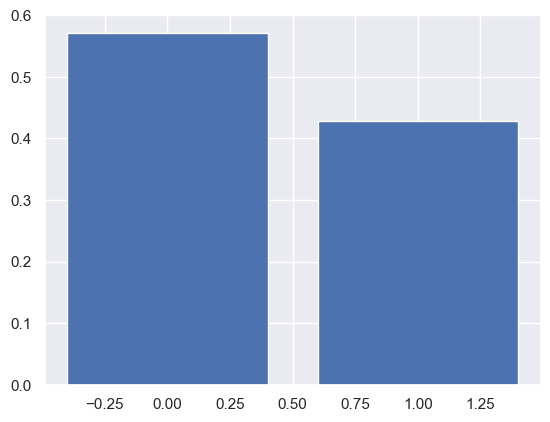

In [8]:
plt.bar([0, 1],state)
plt.savefig("e.png", format="png", dpi=400)
plt.show()

In [21]:
numer = len(np.array(state_ts[1:])[(np.diff(state_ts) > 0)])
#denom = len(np.array(state_ts)[np.isclose(state_ts, 0)])

A_10 = numer / denom
A_10

0.2979860254829429

In [23]:
numer = len(np.array(state_ts[1:])[(np.diff(state_ts) > 0)])
numer

725

Hidden MArkov Model


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

from hidden import dynamics

# Initialize the model
hmm = dynamics.HMM(2, 2)

In [35]:
HA=np.array([[0.8, 0.2], [0.2, 0.8]])
HB= np.array([[0.7, 0.3], [0.3, 0.7]])
hmm.initialize_dynamics(HA, HB)
hmm.A, hmm.B
#HA,HB

(array([[0.8, 0.2],
        [0.2, 0.8]]),
 array([[0.7, 0.3],
        [0.3, 0.7]]))

In [36]:
hmm.run_dynamics(1000)

In [37]:
state_ts = hmm.get_state_ts()
obs_ts = hmm.get_obs_ts()

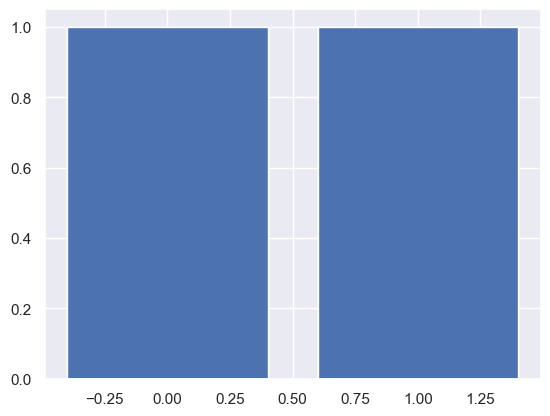

In [46]:
#plt.(obs_ts[:25],state_ts[:25])

plt.bar(obs_ts[:25],state_ts[:25])
plt.show()

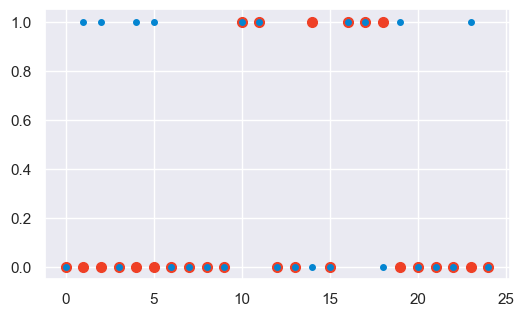

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))
ax.plot(state_ts[:25], 'o', markersize=7, color=sns.xkcd_rgb["tomato"], label="Hidden State")
ax.plot(obs_ts[:25], 'o', markersize=4, color=sns.xkcd_rgb["cerulean"], label="Observation")
plt.show()